In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/Users/user/Downloads/Data_Science_Assignment_M4_updated/train.csv')
test = pd.read_csv('/Users/user/Downloads/Data_Science_Assignment_M4_updated/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


 train.csv : Use this dataset to train the model. This file contains all the weather related features as well as the target variable “count”. Train dataset is comprised of first 18 months

### In this project, you are asked to combine historical usage patterns with weather data in order to forecast hourly bike rental demand.

**Assignment : Regression**  

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able to rent a bike from one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.
The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city.

In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

### Main Aim is - Build a model which will predict hourly rental demand

In [7]:
train.shape,test.shape

((12980, 12), (4399, 11))

In [8]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

**Coorelations between numerical variables**

<AxesSubplot:>

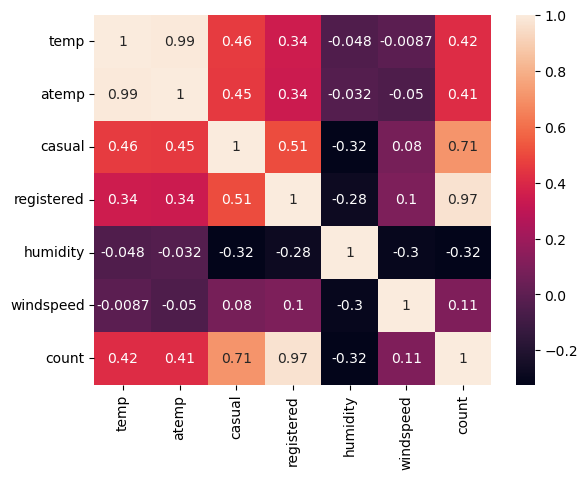

In [9]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
sns.heatmap(corr,annot=True) 

By this heat map we can understand which variable will effect our target variable, we can see that "temp" and "humidity" has little dependency
"atemp" and "temp" got stong positive coorelation,so one of varibale has be dropped during model biulding

### Univiate analysis

/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_6129/2459857181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


<AxesSubplot:xlabel='count', ylabel='Density'>

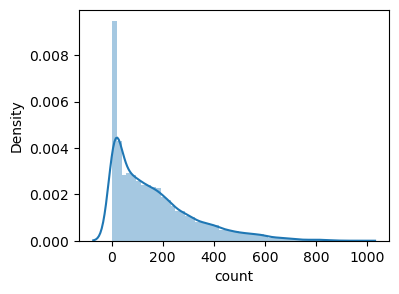

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
sns.distplot(train['count'])

This distribution is right skwed , we can use log function to make the distribution normal

/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_6129/1384187317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']))


<AxesSubplot:xlabel='count', ylabel='Density'>

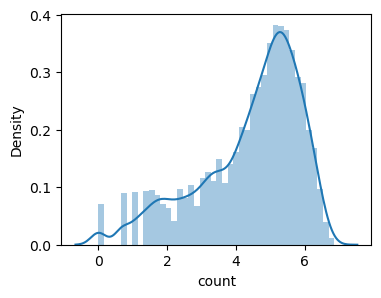

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
sns.distplot(np.log(train['count']))

/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_6129/2312936086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['registered'])


<AxesSubplot:xlabel='registered', ylabel='Density'>

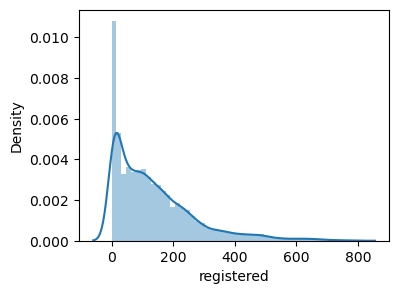

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
sns.distplot(train['registered'])

Most of the data points with in 200

/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_6129/1869212765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['temp'])


<AxesSubplot:xlabel='temp', ylabel='Density'>

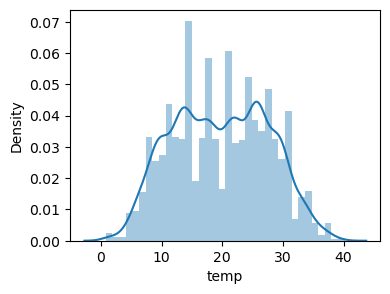

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
sns.distplot(train['temp'])

In [14]:
# extract date ,hour, and month from datetime feature
from datetime import datetime
from datetime import date 
import calendar

train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [15]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set.

In [16]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

 We will drop the datetime, date variable as we have already extracted features from these variables.
 We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [17]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

**Linear Regression Model**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# giving a variable name
Model = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [20]:
x_train = training.drop('count', 1)
y_train = np.log(training['count'])
x_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_6129/2901404279.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = training.drop('count', 1)
/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_6129/2901404279.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val = validation.drop('count', 1)


In [21]:
# Checking the shape
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [22]:
Model.fit(x_train,y_train)

LinearRegression()

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [23]:
# making prediction on validation set
prediction = Model.predict(x_val)

In [24]:
# defining a function which will return the root mean square(logaritmic) score
def rmsle(y, y_):
    y = np.exp(y), 
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [25]:
rmsle(y_val,prediction)

0.8875379204281754

In [27]:
test_prediction = Model.predict(test)

We got a rmsle value of 0.8875 on the validation set.
Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
#tree depth 5 because it achieves the best average accuracy on training data using cross-validation folds with size 5
dt_reg = DecisionTreeRegressor(max_depth=5)

lets fit the desicion tree model 

In [30]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [32]:
predict = dt_reg.predict(x_val)

In [33]:
rmsle(y_val, predict)

0.17102267399446994

The rmsle value has decreased to 0.171. This is a decent score. Let's now make predictions for the test dataset which you can submit in the excel sheet provided to you to generate your score.

In [34]:
test_prediction = dt_reg.predict(test)

These are the log values and we have to convert them back to the original scale

In [ ]:
final_prediction = np.exp(test_prediction)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [ ]:
submission = pd.DataFrame()

In [ ]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [ ]:
submission.to_csv('submission.csv', header=True, index=False)